In [21]:
from scipy import stats
import handcalcs.render
import qgrid
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
import seaborn as sns
import pandas as pd
from theano import shared
from sklearn import preprocessing
from scipy.stats import expon
from scipy.stats import beta
from scipy.stats import gamma
from scipy.stats import poisson
print('Running on PyMC3 v{}'.format(pm.__version__))
sns.set()
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Running on PyMC3 v3.11.4


Bayesian models are also known as probabilistic models because they are built using probabilities. And Bayesian’s use probabilities as a tool to quantify uncertainty. Therefore, the answers we get are distributions not point estimates.

### Bayesian Approach Steps

In [22]:
data = pd.read_csv('/Users/ankitkothari/Documents/gdrivre/data/pricing.csv')
qgrid.show_grid(data, show_toolbar=True)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

#### Percentage of Missing Data 

In [73]:
(data.isnull().sum()/len(data))*100

insert_date     0.000000
origin          0.000000
destination     0.000000
start_date      0.000000
end_date        0.000000
train_type      0.000000
price          11.946663
train_class     0.399256
fare            0.399256
dtype: float64

#### Subtituting Missing Data 

In [74]:
data.groupby('fare').mean()['price']

fare
Adulto ida              31.127219
Flexible                82.077189
Individual-Flexible    150.600000
Mesa                   181.000000
Promo                   62.442987
Promo +                 37.233383
Name: price, dtype: float64

In [75]:
data['train_class'] = data['train_class'].fillna(data['train_class'].mode().iloc[0])
data['fare'] = data['fare'].fillna(data['fare'].mode().iloc[0])
data['price'] = data[['price','fare']].groupby('fare').transform(lambda x: x.fillna(x.mean()))

### Gaussian Inferences

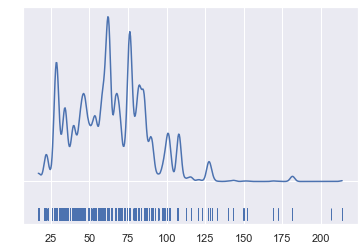

In [76]:
az.plot_kde(data['price'].values, rug=True)
plt.yticks([0], alpha=0);

In [77]:
with pm.Model() as model_g:
    μ = pm.Uniform('μ', lower=0, upper=300)
    σ = pm.HalfNormal('σ', sd=10)
    y = pm.Normal('y', mu=μ, sd=σ, observed=data['price'].values)
    trace_g = pm.sample(1000, tune=1000)

2022-01-22 23:54:01,285 [8137] WARNING  py.warnings:109: [JupyterRequire] /var/folders/qp/14hq37js5_7g92qm54090zp00000gn/T/ipykernel_8137/1536193622.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_g = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


2022-01-22 23:54:22,991 [8137] ERROR    arviz.data.io_pymc3_3x:94: [JupyterRequire] Got error No model on context stack. trying to find log_likelihood in translation.
2022-01-22 23:54:22,993 [8137] WARNING  py.warnings:109: [JupyterRequire] /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(

2022-01-22 23:54:24,757 [8137] ERROR    arviz.data.io_pymc3_3x:94: [JupyterRequire] Got error No model on context stack. trying to find log_likelihood in translation.


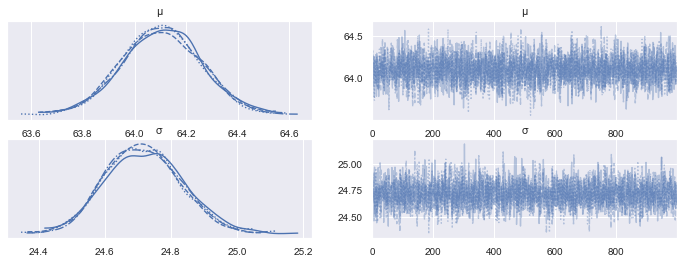

In [78]:
az.plot_trace(trace_g);

In [79]:
μ

μ ~ Uniform

2022-01-22 23:54:27,510 [8137] WARNING  py.warnings:109: [JupyterRequire] /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/plots/jointplot.py:145: UserWarning: plot_joint will be deprecated. Please use plot_pair instead.
  warnings.warn("plot_joint will be deprecated. Please use plot_pair instead.")

2022-01-22 23:54:27,512 [8137] ERROR    arviz.data.io_pymc3_3x:94: [JupyterRequire] Got error No model on context stack. trying to find log_likelihood in translation.
2022-01-22 23:54:27,513 [8137] WARNING  py.warnings:109: [JupyterRequire] /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(



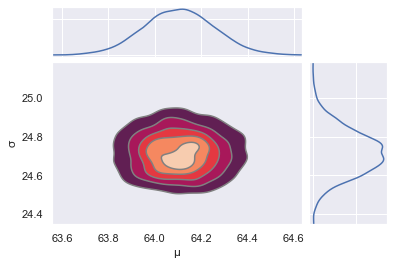

In [80]:
az.plot_joint(trace_g, kind='kde', fill_last=False);

#### What is Bayesian?

1. Bayesian inference is simply updating your beliefs after considering new evidence.


#### What is the difference betweeen Frequentist (FP) and Bayesian (BP)

1. Flipping a coin 
    - Bayesian perspective will say 50% chance of it being a Tail or a Head
    - Frequentist perspective will say its 0 or 100% I just don't know th answer 
    - FP has the notion if they get correct answer ot not, what are the chances my method hits the right answer ? The idea of Methods quality (power and significance)
    - Have an opinion use data to change your opionion, that is Bayesian 
    - FP action that is, I am happy to take this action by default. Does my evidence change my mind about that decesion. Is the evidence strong enough for me not to take the action. Methods Quality

2. Parameter 
    - It is only by insisting that the parameter is not a random variable (Frequentist) that it makes any kind of sense to talk about your method’s ability to deliver the right answer. As soon as you let the parameter be a random variable (Bayesian), there’s no longer any notion of right and wrong. There’s only your personal perspective.
    - Frequentist: the parameter is a fixed quantity (no probability about it)
    - Bayesian: the parameter is a random variable (no right answer)

    

#### Common Jargon for FP and BP

- Frequentist: confidence interval, p-value, power, significance
- Bayesian: credible interval, prior, posterior
- Frequentist: the core concepts are harder to wrap your head around (e.g. p-values and confidence intervals have counter-intuitive, wordy definitions) and lazy thinkers make a hash out of them frequent-ly.
- Bayesian: you lose the ability to talk about any notion of “right answers” and “method quality” — there’s no such thing as statistically significant or rejecting the null. There’s only “more likely” and “less likely” …from your perspective.

#### When to use FP vs BP
- It depends on whether the situation calls for choosing between actions or forming an evidence-based opinion.
- For example, in our debugging problem above, calling the frequentist function with the argument "My code passed all X tests; is my code bug-free?" would return a YES. On the other hand, asking our Bayesian function "Often my code has bugs. My code passed all X tests; is my code bug-free?" would return something very different: probabilities of YES and NO. The function might return:

YES, with probability 0.8; NO, with probability 0.2

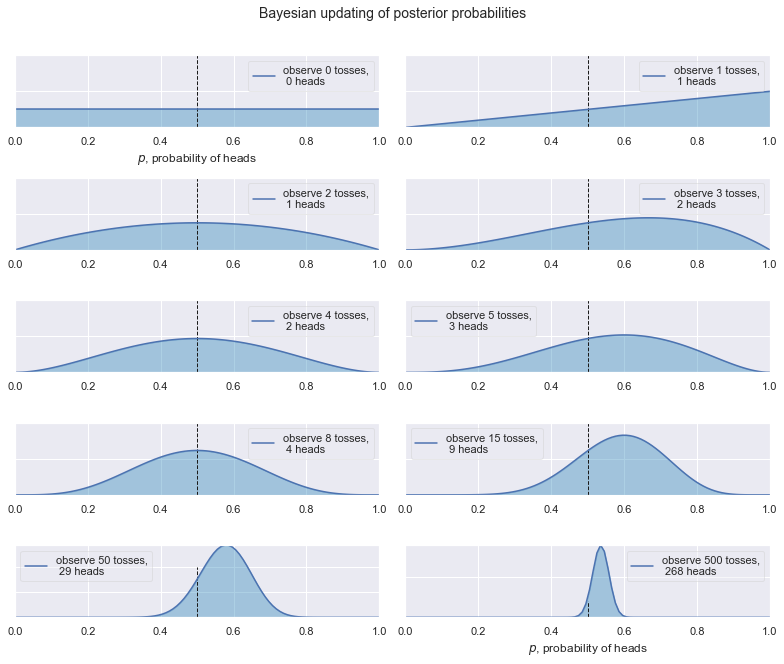

In [81]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)//2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

In [82]:
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
r = bernoulli.rvs(.2, size=10)

In [83]:
r

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [84]:
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])

In [85]:
x = np.linspace(0, 1, 100)

In [16]:
x_b = np.arange(0,100,1)

In [17]:
x_b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

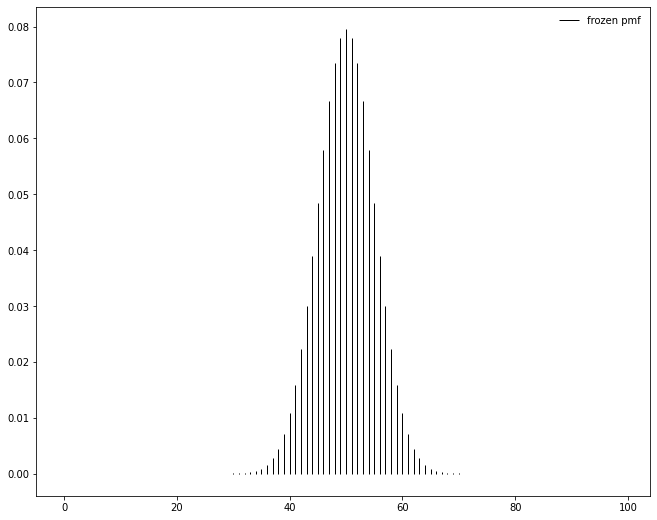

In [18]:
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
rv = binom(100, .5)
ax.vlines(x_b, 0, rv.pmf(x_b), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

In [19]:
prob = binom.cdf(x_b, 100, .5)

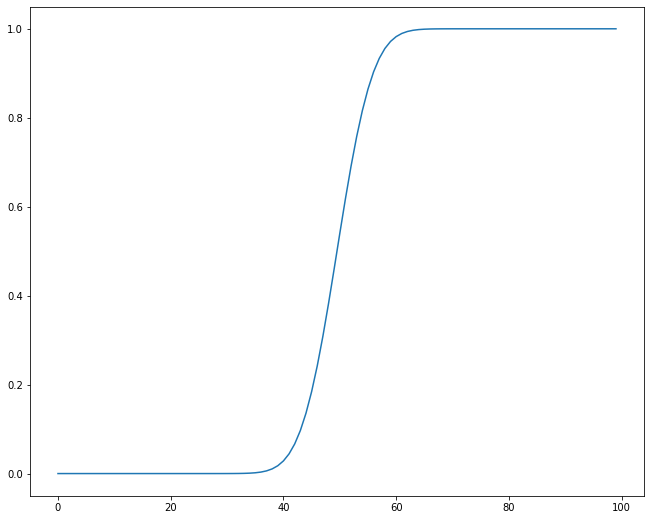

In [20]:
plt.plot(prob)

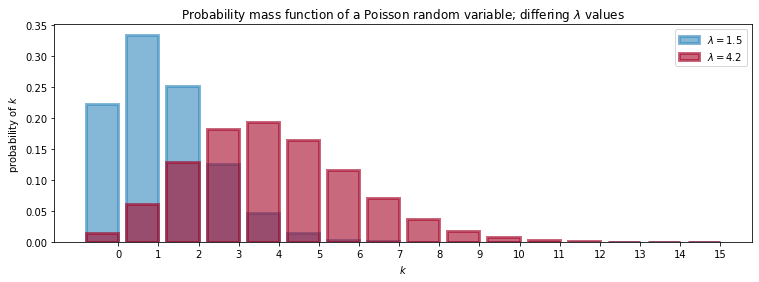

In [21]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values");

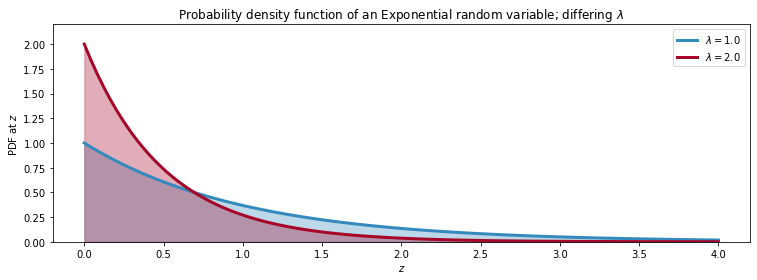

In [22]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [1, 2]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0,2.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");


In [23]:
d = expo.pdf(a, scale=1./l)

#### But what is λ? (Parameter Estimation)

But what is λ?
This question is what motivates statistics. In the real world, λ is hidden from us. We see only Z, and must go backwards to try and determine λ. The problem is difficult because there is no one-to-one mapping from Z to λ. Many different methods have been created to solve the problem of estimating λ, but since λ is never actually observed, no one can say for certain which method is best!

Bayesian inference is concerned with beliefs about what λ might be. Rather than try to guess λ exactly, we can only talk about what λ is likely to be by assigning a probability distribution to λ.

This might seem odd at first. After all, λ is fixed; it is not (necessarily) random! How can we assign probabilities to values of a non-random variable? Ah, we have fallen for our old, frequentist way of thinking. Recall that under Bayesian philosophy, we can assign probabilities if we interpret them as beliefs. And it is entirely acceptable to have beliefs about the parameter λ.

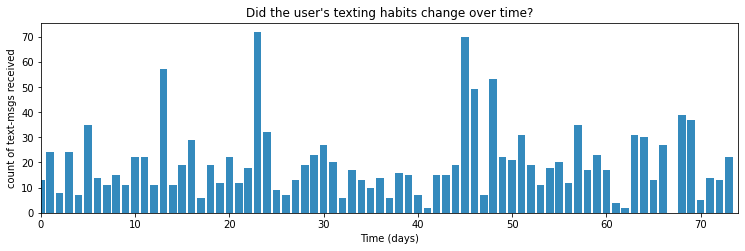

In [24]:
figsize(12.5, 3.5)
count_data = np.loadtxt("/Users/ankitkothari/Documents/gdrivre/data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);


In [25]:
import pymc3 as pm

with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

In [43]:
tau.random()

array(46)

In [26]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

In [27]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

In [28]:
observation

obs ~ Poisson

This technique returns thousands of random variables from the posterior distributions of λ1,λ2 and τ. We can plot a histogram of the random variables to see what the posterior distributions look like. Below, we collect the samples (called traces in the MCMC literature) into histograms.

In [29]:
### Mysterious code to be explained in Chapter 3.
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step, return_inferencedata=False)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [tau]
>Metropolis: [lambda_2]
>Metropolis: [lambda_1]


Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 21 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [30]:
trace

<MultiTrace: 4 chains, 10000 iterations, 5 variables>

In [31]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

In [32]:
lambda_1_samples

array([17.18227201, 17.18227201, 18.13319022, ..., 17.36692492,
       17.36692492, 17.36692492])

In [33]:
tau_samples

array([42, 42, 42, ..., 43, 43, 44])

In [34]:
np.ones_like(tau_samples)

array([1, 1, 1, ..., 1, 1, 1])

In [71]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    #print(ix)
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");

NameError: name 'figsize' is not defined

In [46]:
tau_samples

array([42, 42, 42, ..., 43, 43, 44])

In [47]:
expected_texts_per_day = np.zeros(n_count_data)

In [48]:
expected_texts_per_day

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [50]:
tau_samples.shape

(40000,)

## Distributions

- https://distribution-explorer.github.io/

### poison

#### Definition

**To predict the probability of a given number of events occurring in a fixed interval of time.**

- https://towardsdatascience.com/poisson-distribution-intuition-and-derivation-1059aeab90d

Arrival of buses in Poissonville is what we call a Poisson process. The timing of the next event is completely independent of when the previous event happened. Many real-life processes behave in this way.


natural births in a given hospital (there is a well-defined average number of natural births per year, and the timing of one birth is independent of the timing of the previous one);
Landings on a website;
- Meteor strikes;
- Molecular collisions in a gas;
- Aviation incidents.
- Any process that matches the buses in Poissonville story is a Poisson process.

**The number of arrivals of a Poisson process in a given amount of time is Poisson distributed. The Poisson distribution has one parameter, the average number of arrivals in a given length of time. So, to match the story, we could consider the number of hits on a website in an hour with an average of six hits per hour. This is Poisson distributed.**

*For example, your blog has 500 visitors a day. That is a rate. The number of customers arriving at the store in an hour, the number of earthquakes per year, the number of car accidents in a week, the number of typos on a page, the number of hairs found in Chipotle, etc., are all rates (λ) of the unit of time, which is the parameter of the Poisson distribution.*


In [6]:
# We set a seed so that the results are reproducible.
SEED = 5
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
np.random.seed(SEED)
# number of samples.
n = 100
# true parameter.
lam_true = 2
# sample array.
y = np.random.poisson(lam=lam_true, size=n)
y

array([2, 4, 1, 0, 2, 2, 2, 2, 1, 1, 3, 2, 0, 1, 3, 3, 4, 2, 0, 0, 3, 6,
       1, 2, 1, 2, 5, 2, 3, 0, 1, 3, 1, 4, 1, 2, 4, 0, 6, 4, 1, 2, 2, 0,
       1, 2, 4, 4, 1, 3, 0, 3, 3, 2, 4, 2, 2, 1, 1, 2, 5, 2, 3, 0, 1, 1,
       1, 3, 4, 1, 3, 4, 2, 1, 2, 4, 2, 2, 1, 0, 2, 2, 3, 0, 3, 3, 4, 2,
       2, 1, 2, 1, 3, 0, 1, 0, 3, 3, 1, 2])

#### PMF for Poison 

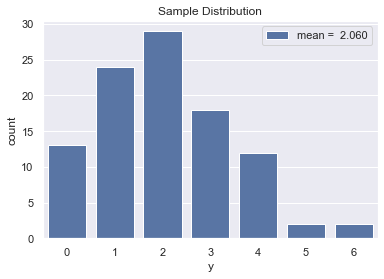

In [23]:
# Histogram of the sample.
fig, ax = plt.subplots()
sns.countplot(x=y, color=sns_c[0], label=f'mean = {y.mean(): 0.3f}', ax=ax)
ax.legend(loc='upper right')
ax.set(title='Sample Distribution', xlabel='y');


#### CDF for Poison

In [23]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n+1) / n

    return x, y

In [10]:
x_a,y_a = ecdf(y) 

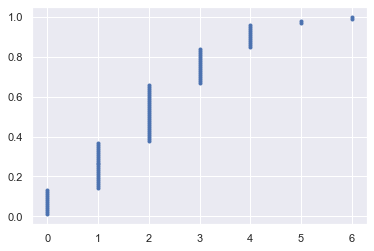

In [25]:
# Plot the ECDF
plt.plot(x_a,y_a, marker='.', linestyle='none');


### Bernouli

### Binomial

#### PMF for Binomial 

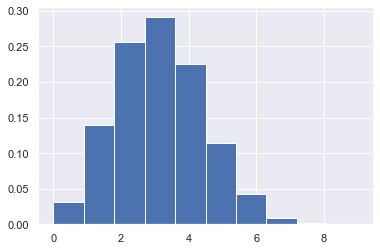

In [19]:
# Simulate 1,000 run of flipping the biased coin 10 times
x = np.random.binomial(10, 0.3, 10000)
# If we flip a coin 10 times and has a probability of success of .3,
# How many success do we will get in one set of 10 flips
# Over a period of 10000 samples what is the distribution that we get
# 1 Heads in 10 coin flips
# 2 Heads in 10 coin flips
# 3 Heads in 10 coin flips
#...
# 10 Heads in 10 coin flips
# Plot normalized histogram of results
plt.hist(x, density=True, bins=10);

#### CDF for Binomial

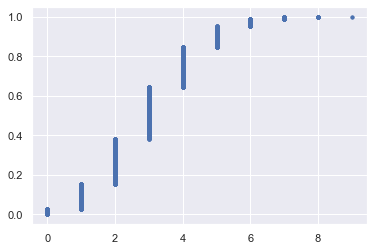

In [20]:
# Generate x- and y-data for the ECDF
x_flips, y_flips = ecdf(x)

# Plot the ECDF
plt.plot(x_flips, y_flips, marker='.', linestyle='none');

In [21]:
#If I flip a biased coin () 20 times, what is the probability of 5 or more heads?
sum(np.random.binomial(20, 0.2, 10000) >= 5)/10000

0.3743

In [22]:
#If I flip a fair coin 20 times, what is the probability of 5 or more heads?
sum(np.random.binomial(20,0.5,10000) >= 5)/10000

0.9947

### Multinomial

### Exponential

#### Definition

- **To predict the amount of waiting time until the next event (i.e., success, failure, arrival, etc.).**
- **The definition of exponential distribution is the probability distribution of the time *between* the events in a Poisson process.**
- https://towardsdatascience.com/what-is-exponential-distribution-7bdd08590e2a

For example, we want to predict the following:
- The amount of time until the customer finishes browsing and actually purchases something in your store (success).
- The amount of time until the hardware on AWS EC2 fails (failure).
- The amount of time you need to wait until the bus arrives (arrival).

X ~ Exp(λ) 👉 Is the exponential parameter λ the same as λ in Poisson?
One thing that would save you from the confusion later about X ~ Exp(0.25) is to remember that 0.25 is not a time duration, but it is an event rate, which is the same as the parameter λ in a Poisson process.
For example, your blog has 500 visitors a day. That is a rate. The number of customers arriving at the store in an hour, the number of earthquakes per year, the number of car accidents in a week, the number of typos on a page, the number of hairs found in Chipotle, etc., are all rates (λ) of the unit of time, which is the parameter of the Poisson distribution.
However, **when we model the elapsed time between events, we tend to speak in terms of time instead of rate**, e.g., the number of years a computer can power on without failure is 10 years (instead of saying 0.1 failure/year, which is a rate), a customer arrives every 10 minutes, major hurricanes come every 7 years, etc. When you see **the terminology — “mean” of the exponential distribution — 1/λ is what it means**.

So, now you can answer the following: Like Poison is say ex: 3 events per hour; Expo what is the avg time for 1 event to happen that is 1/3 of an hour ; Pois(3); Exp(3)
    
**What does it mean for “X ~ Exp(0.25)”?**

It means the Poisson rate will be 0.25. During a unit time (either it’s a minute, hour or year), the event occurs 0.25 times on average. Converting this into time terms, it takes 4 hours (a reciprocal of 0.25) until the event occurs, assuming your unit time is an hour.


#### PDF of Exponential Distribution

A PDF is the derivative of the CDF.
Since we already have the CDF, 1 - P(T > t), of exponential, we can get its PDF by differentiating it.
- λe^−λt

In [24]:
# Load nuclear power accidents data & create array of inter-incident times
df = pd.read_csv(
    '/Users/ankitkothari/Documents/gdrivre/data/nuclear_power_accidents.csv')
df.Date = pd.to_datetime(df.Date)
df = df[df.Date >= pd.to_datetime('1974-01-01')]
inter_times = np.diff(np.sort(df.Date)).astype(float) / 1e9 / 3600 / 24

In [112]:
inter_times

array([ 98.,  44., 228.,  25.,   7.,  29., 362.,  52., 108., 274., 330.,
        52.,   0., 110.,   9.,  48.,   1., 183., 172.,  21.,  61.,  81.,
        25., 196.,  11., 148.,  22.,   5.,  85.,  83., 156.,  14.,  11.,
       145.,  37.,  16.,   0.,   3.,  36.,  39., 126.,   4.,  56.,  34.,
        60., 175.,  92.,   5.,  69., 118.,   8., 106.,  15.,   8.,  18.,
         0., 201., 124.,  22., 227.,   2.,  97.,   4.,  44.,   0.,  37.,
        84.,  73., 103.,  12., 177.,  29.,  46.,  25., 280., 137.,  53.,
       228., 156.,  22.,  46.,  35., 185.,  24.,   3.,  29.,   6., 263.,
       385.,  19., 103., 206.,  74.,  85., 110.,   3.,  15., 270.,  84.,
        55., 568.,  24., 103.,   1.,  88., 447., 147., 124.,  38.,   0.,
        26., 248.,  31.,  54.,  85., 223., 179.,  85., 253.,  12.,  46.,
        12.,  37., 204.,  10., 111., 182., 206., 322.,  30.,   0.,   9.,
        45., 200.,  87.,  24.,  39.,  15.,  96.,  62., 380.,  23.,   0.,
       165.,  20.,   9.,  28.,  63.,   1.,  39.,  4

(array([91., 37., 12., 16.,  8.,  2.,  3.,  1.,  0.,  1.]),
 array([  0. ,  56.8, 113.6, 170.4, 227.2, 284. , 340.8, 397.6, 454.4,
        511.2, 568. ]),
 <BarContainer object of 10 artists>)

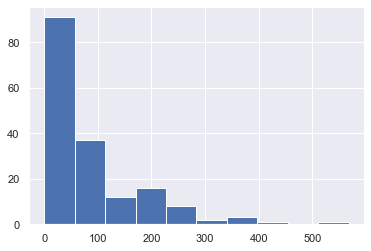

In [53]:
plt.hist(inter_times)

#### CDF of Exponential Distribution

- **P(T > t) = P(X=0 in t time units) = e^−λt**
- **P(T< t) = 1-e^−λt**

* T : the random variable of our interest!
      the random variable for the waiting time until the first event
* X : the # of events in the future which follows the Poisson dist.
* P(T > t) : The probability that the waiting time until the first event is greater than t time units
* P(X = 0 in t time units) : The probability of zero successes in t time units

In [57]:
# Compute mean and sample from exponential
mean = np.mean(inter_times)
samples = np.random.exponential(mean, size=10**6)
print(mean)
#mean of 87 means on an average 87 days betweeen each incident occurs
# Compute ECDFs for sample & model
x, y = ecdf(inter_times)
x_theor, y_theor = ecdf(samples)

87.14035087719299


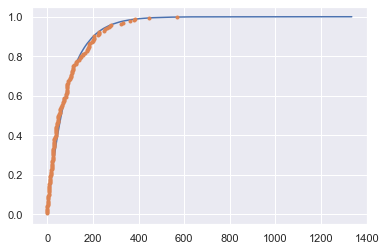

In [56]:
# Plot sample & model ECDFs
plt.plot(x_theor, y_theor);
plt.plot(x, y, marker='.', linestyle='none');

What is the probability of an incident happening in less than 50 days?

In [65]:

#P(T< t) = 1-e^−λt
t=50
b=mean   #b=(1/λ)
p=expon.cdf(t, loc=0, scale=mean)
p

0.43661215275713816

What is the probability of an incident happening in greater than 200 days?

In [71]:
t=200
b=mean #b=(1/λ)
p1= 1-expon.cdf(t, loc=0, scale=mean)
p1

0.10074648403843156

### Gamma

- https://towardsdatascience.com/gamma-function-intuition-derivation-and-examples-5e5f72517dee


**Why do we need the Gamma function?**
- Because we want to generalize the factorial!

f(1) = 1, f(2) = 2!, f(3) = 3!, f(4) = 4!, … https://en.wikipedia.org/wiki/Gamma_function
- The factorial function is defined only for discrete points (for positive integers — black dots in the graph above), but we wanted to connect the black dots.<div class="burk"> We want to extend the factorial function to all complex numbers </div><i class="fa fa-lightbulb-o "></i>. The simple formula for the factorial, x! = 1 * 2 * … * x, cannot be used directly for fractional values because it is only valid when x is a whole number.


**Properties of Gamma Function:** 
- When z is a natural number, Γ(z) =(z-1)! example: Γ(4.8) =(3.8)!
- Unlike the factorial, which takes only the positive integers, we can input any real/complex number into z, including negative numbers. The Gamma function connects the black dots and draws the curve nicely.
- Property 1.

<span class="girk"> 
- given z > 1
; Γ(z)   = (z-1) * Γ(z-1)
or you can write it as
; Γ(z+1) =  z    * Γ(z)</span></div><i class="fa fa-lightbulb-o "></i>

#### Plotting the Gamma function 
- See book for the Gamma Function EQUATION

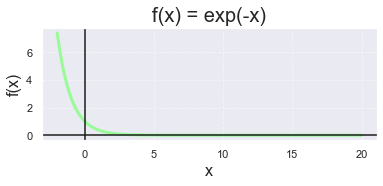

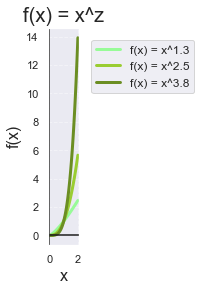

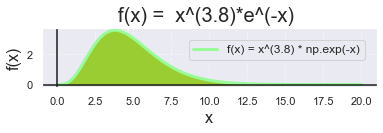

In [38]:
########################
# f(x) = exp(-x) graph #
########################
import matplotlib.pyplot as plt
import numpy as np
# Create x and y
x = np.linspace(-2, 20, 100)
y = np.exp(-x)
# Create the plot
fig, ax = plt.subplots()
plt.plot(x, y, label='f(x) = exp(-x)', linewidth=3, color='palegreen')
# Make the x=0, y=0 thicker
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
# Add a title
plt.title('f(x) = exp(-x)', fontsize=20)
# Add X and y Label
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()
####################
# f(x) = x^z graph #
####################
# Create x and y
x = np.linspace(0, 2, 100)
y1 = x**1.3
y2 = x**2.5
y3 = x**3.8
# Create the plot
fig, ax = plt.subplots()
plt.plot(x, y1, label='f(x) = x^1.3', linewidth=3, color='palegreen')
plt.plot(x, y2, label='f(x) = x^2.5', linewidth=3, color='yellowgreen')
plt.plot(x, y3, label='f(x) = x^3.8', linewidth=3, color='olivedrab')
# Make the x=0, y=0 thicker
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
# Add a title
plt.title('f(x) = x^z', fontsize=20)
# Add X and y Label
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Add a Legend
plt.legend(bbox_to_anchor=(1, 1), loc='best', borderaxespad=1, fontsize=12)
# Show the plot
plt.show()
###############################
# f(x) = x^(3.8)*e^(-x) graph #
###############################
# Create x and y
x = np.linspace(0, 20, 100)
y = x**3.8 * np.exp(-x)
# Create the plot
fig, ax = plt.subplots()
plt.plot(x,
         y,
         label='f(x) = x^(3.8) * np.exp(-x)',
         linewidth=3,
         color='palegreen')
ax.fill_between(x, 0, y, color='yellowgreen')
# Make the x=0, y=0 thicker
ax.set_aspect('equal')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
# Add a title
plt.title('f(x) =  x^(3.8)*e^(-x) ', fontsize=20)
# Add X and y Label
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Add a Legend
plt.legend(bbox_to_anchor=(1, 1),
           loc='upper right',
           borderaxespad=1,
           fontsize=12)
# Show the plot
plt.show()

#### Gamma Distribution

#### Definition 
- **The exponential distribution predicts the wait time until the *very first* event. The gamma distribution, on the other hand, predicts the wait time until the *k-th* event occurs.**
- **If arrivals of events follow a Poisson process with a rate λ, the wait time until k arrivals follows Γ(k, λ).**
- k : The number of events for which you are waiting to occur.
- λ : The rate of events happening which follows the Poisson process.

- https://towardsdatascience.com/gamma-distribution-intuition-derivation-and-examples-55f407423840

**Examples of Gamma Distribution**
- We can use the Gamma distribution for every application where the exponential distribution is used 
- Wait time modeling, Reliability (failure) modeling, 
- Service time modeling (Queuing Theory), etc. — because exponential distribution is a special case of Gamma distribution (just plug 1 into k).

**Example**
- [Queuing Theory Example] You went to Chipotle and joined a line with two people ahead of you. One is being served and the other is waiting. Their service times S1 and S2 are independent, exponential random variables with a mean of 2 minutes. (Thus the mean service rate is .5/minute. If this “rate vs. time” concept confuses you, read this to clarify.)


In [59]:
#P(T<5) when lambda = 2 and less than 2 events needs to happeen
#    k : the number of events for which you are waiting to occur. a in the code
#   λ : the rate of events happening following Poisson dist.  1/scale in the code
a = 2  # k = 10
x = 5
lambda_ = .5 #(2 minutes per customer (rate per event with time) which is .5 customer/min (rate for poison))
p1 = gamma.cdf(x, a, scale=1/lambda_)
p1

0.7127025048163542

In [60]:
#P(T>5) when lambda = 2 and less than 2 events needs to happeen
#    k : the number of events for which you are waiting to occur. a in the code
#   λ : the rate of events happening following Poisson dist.  1/scale in the code
a = 2  # k = 10
x = 5
lambda_ = .5 #(2 minutes per customer (rate per event with time) which is .5 customer/min (rate for poison))
p1 = gamma.sf(x, a, scale=1/lambda_)
p1

0.2872974951836458

#### PDF of Gamma

**Notation**
- T : the random variable for wait time until the k-th event
     (This is the random variable of interest!)
- Event arrivals are modeled by a Poisson process with rate λ.
- k : the 1st parameter of Gamma. The # of events for which you are waiting.
- λ : the 2nd parameter of Gamma. The rate of events happening which follows the Poisson process.
- P(T > t) : The probability that the waiting time until the k-th event is greater than t time units
- P(X = k in t time units) : The Poisson probability of k events occuring during t time units

In [47]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
def plot_gamma_k():
    """
    k : the number of events for which you are waiting to occur.
    λ : the rate of events happening following Poisson dist.
    """
    x = np.linspace(0, 50, 1000)
    a = 1  # k = 1
    mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
    y1 = gamma.pdf(x, a)
    a = 5  # k = 5
    mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
    y2 = gamma.pdf(x, a)
    a = 10  # k = 15
    mean, var, skew, kurt = gamma.stats(a, moments='mvsk')
    y3 = gamma.pdf(x, a)
    plt.title("PDF of Gamma Distribution")
    plt.xlabel("T")
    plt.ylabel("Probability Density")
    plt.plot(x, y1, label="k = 1", color='palegreen')
    plt.plot(x, y2, label="k = 5", color='yellowgreen')
    plt.plot(x, y3, label="k = 10", color='olivedrab')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right',
               borderaxespad=1, fontsize=12)
    plt.ylim([0, 0.40])
    plt.xlim([0, 20])
    plt.savefig('gamma_k.png')
    plt.show()
def plot_gamma_lambda():
    """
    k : the number of events for which you are waiting to occur.
    λ : the rate of events happening following Poisson dist.
    """
    a = 10  # k = 10
    x = np.linspace(0, 50, 1000)
    lambda_ = 1
    mean, var, skew, kurt = gamma.stats(a, scale=1/lambda_, moments='mvsk')
    y1 = gamma.pdf(x, a, scale=1/lambda_)
    lambda_ = 2
    mean, var, skew, kurt = gamma.stats(a, scale=1/lambda_, moments='mvsk')
    y2 = gamma.pdf(x, a, scale=1/lambda_)
    lambda_ = 3
    mean, var, skew, kurt = gamma.stats(a, scale=1/lambda_, moments='mvsk')
    y3 = gamma.pdf(x, a, scale=1/lambda_)
    plt.title("PDF of Gamma Distribution (k = 10)")
    plt.xlabel("T")
    plt.ylabel("Probability Density")
    plt.plot(x, y1, label="λ = 1", color='gold')
    plt.plot(x, y2, label="λ = 2", color='burlywood')
    plt.plot(x, y3, label="λ = 3", color='darkorange')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper right',
               borderaxespad=1, fontsize=12)
    plt.ylim([0, 0.40])
    plt.xlim([0, 20])
    plt.savefig('gamma_lambda.png')
    plt.show()

**For a fixed rate λ, if we wait for more events (k) to happen, the wait time (T) will be longer.**

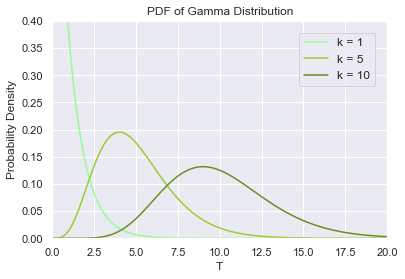

In [46]:
plot_gamma_k()

**For a fixed number of events k, when the event rate λ is higher, we wait for a shorter amount of time T.**

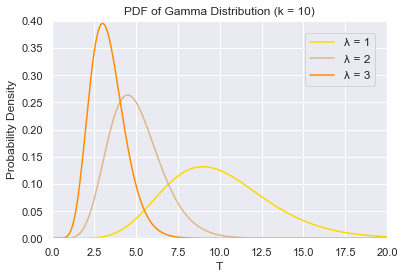

In [48]:
plot_gamma_lambda()
#(x axis label T is time taken when lambda is 1,2,3 abd k waiting till 10 events to happen)

In [64]:
shape = k = 10
λ = 2
scale = 1/λ 
gamma_samples = np.random.gamma(shape, scale=scale, size=1000)
gamma_samples

array([ 5.00660735,  4.82518762,  8.5167703 ,  4.05588253,  2.90910852,
        5.0731948 ,  3.26174842,  3.7114725 ,  4.13830201,  4.74398179,
        6.76216142,  4.44522324,  3.58782052,  4.0257062 ,  4.92665494,
        4.76624783,  5.74203551,  3.04361286,  6.83549402,  3.85197809,
        5.92079304,  6.75694412,  3.96574989,  5.95676109,  7.80618924,
        5.48776844,  5.90394813,  3.19444223,  6.18058144,  4.77533354,
        5.93464254,  4.76106384,  3.77317038,  4.8518214 ,  5.1503706 ,
        6.87597938,  5.59419531,  5.10784783,  5.11885637,  2.58832427,
        6.6535281 ,  2.92728815,  4.76144765,  4.26786497,  2.92626215,
        3.56060413,  4.97727698,  5.30524095,  5.97460036,  6.0940817 ,
        8.48328251,  4.9015099 ,  7.91203721,  5.16049782,  8.27956071,
        8.86593245,  6.40228589,  3.6533902 ,  4.64842923,  4.70209928,
        4.21307945,  6.44081396,  2.22746026,  4.44538532,  7.30115026,
        2.95233521,  3.55688215,  3.8771189 ,  3.30075408,  5.96

In [68]:
x_gamma, y_gamma = ecdf(gamma_samples)

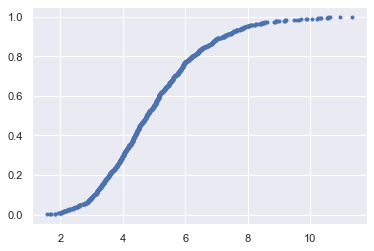

In [70]:
plt.plot(x_gamma, y_gamma, marker='.', linestyle='none');

### Normal

#### Definition

#### PDF For Normal

Text(0, 0.5, 'PDF')

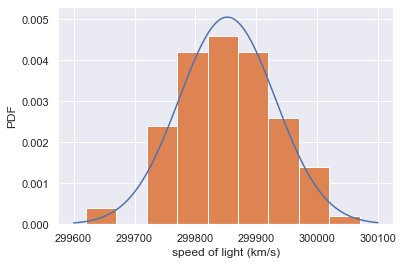

In [15]:

# Load data, plot histogram 
import scipy.stats as st
df = pd.read_csv('/Users/ankitkothari/Documents/gdrivre/data//michelson_speed_of_light.csv')
df = df.rename(columns={'velocity of light in air (km/s)': 'c'})
c = df.c.values
x_s = np.linspace(299.6, 300.1, 400) * 1000
plt.plot(x_s, st.norm.pdf(x_s, c.mean(), c.std(ddof=1)))
plt.hist(c, bins=9, density=True)
plt.xlabel('speed of light (km/s)')
plt.ylabel('PDF')

#### CDF for Normal

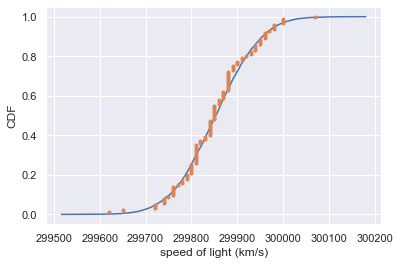

In [47]:
# Get speed of light measurement + mean & standard deviation
michelson_speed_of_light = df.c.values
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light, ddof=1)

# Generate normal samples w/ mean,  std of data
samples = np.random.normal(mean, std, size=10000)

# Generate data ECDF & model CDF
x, y = ecdf(michelson_speed_of_light)
x_theor, y_theor = ecdf(samples)

# Plot data & model (E)CDFs
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('speed of light (km/s)')
_ = plt.ylabel('CDF')

### Half Normal

### T-Distribution

### Beta 

#### Definition

- **The Beta distribution is a probability distribution on probabilities. Because the Beta distribution models a probability, its domain is bounded between 0 and 1.**

For example, we can use it to model the probabilities: 
    
- the Click-Through Rate of your advertisement, 
- the conversion rate of customers actually purchasing on your website, 
- how likely readers will clap for your blog, how likely it is that 
- Trump will win a second term, 
- the 5-year survival chance for women with breast cancer, and so on.

**Difference Between Binomial and Beta Distributions**
- The difference between the binomial and the beta is that the former models the number of successes (x), while the latter models the probability (p) of success.
- In other words, the probability is a parameter in binomial; In the Beta, the probability is a random variable.

**Interpretation of α, β**
- You can think of α-1 as the number of successes and β-1 as the number of failures, just like n & n-x terms in binomial.
- You can choose the α and β parameters however you think they are supposed to be. If you think the probability of success is very high, let’s say 90%, set 90 for α and 10 for β. If you think otherwise, 90 for β and 10 for α.
- As α becomes larger (more successful events), the bulk of the probability distribution will shift towards the right, whereas an increase in β moves the distribution towards the left (more failures).
- Also, the distribution will narrow if both α and β increase, for we are more certain.
-**The Uniform distribution on the interval [0, 1] is a special case of the Beta distribution with  α=β=1** .



**Example: Probability of Probability**

- Let’s say how likely someone would agree to go on a coffee with you follows a Beta distribution with α = 2 and β = 8. What is the probability that your success rate will be greater than 50%?
- P(X>0.5) = 1- CDF(0.5) = 0.01953


#### PDF for Beta Distribution

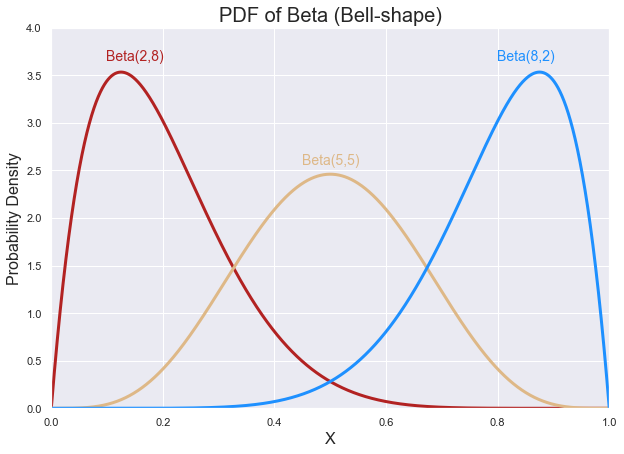

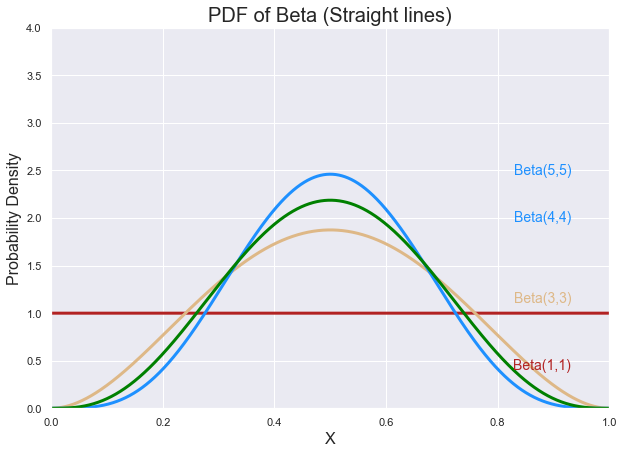

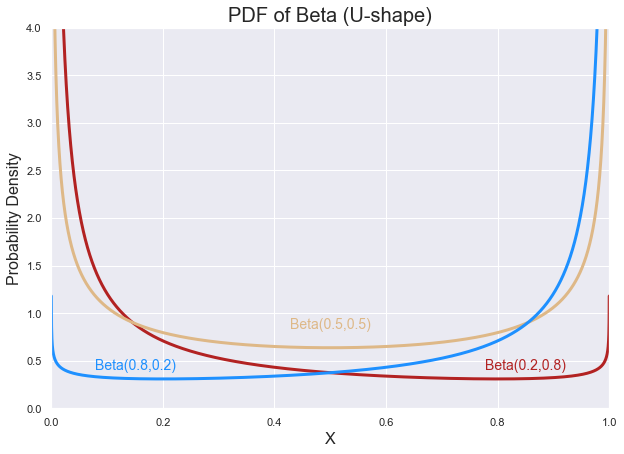

In [196]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]

# Bell shape
x = np.linspace(0, 1, 10000)
y1 = beta.pdf(x, 2, 8)
y2 = beta.pdf(x, 5, 5)
y3 = beta.pdf(x, 8, 2)

plt.title("PDF of Beta (Bell-shape)", fontsize=20)
plt.xlabel("X", fontsize=16)
plt.ylabel("Probability Density", fontsize=16)
plt.plot(x, y1, linewidth=3, color='firebrick')
plt.annotate("Beta(2,8)", xy=(0.15, 3.7), size = 14, ha='center', va='center', color='firebrick')
plt.plot(x, y2, linewidth=3, color='burlywood')
plt.annotate("Beta(5,5)", xy=(0.5, 2.6), size = 14, ha='center', va='center', color='burlywood')
plt.plot(x, y3, linewidth=3, color='dodgerblue')
plt.annotate("Beta(8,2)", xy=(0.85, 3.7), size = 14, ha='center', va='center', color='dodgerblue')
plt.ylim([0, 4])
plt.xlim([0, 1])
plt.show()

# Straight lines
x = np.linspace(0, 1, 10000)
y1 = beta.pdf(x, 1, 1)
y2 = beta.pdf(x, 3, 3)
y2a = beta.pdf(x, 4, 4)
y3 = beta.pdf(x, 5, 5)

plt.title("PDF of Beta (Straight lines)", fontsize=20)
plt.xlabel("X", fontsize=16)
plt.ylabel("Probability Density", fontsize=16)
plt.plot(x, y1, linewidth=3, color='firebrick')
plt.annotate("Beta(1,1)", xy=(0.88, 0.45), size = 14, ha='center', va='center', color='firebrick')
plt.plot(x, y2, linewidth=3, color='burlywood')
plt.annotate("Beta(3,3)", xy=(0.88, 1.15), size = 14, ha='center', va='center', color='burlywood')
plt.plot(x, y3, linewidth=3, color='dodgerblue')
plt.annotate("Beta(4,4)", xy=(0.88, 2.0), size = 14, ha='center', va='center', color='dodgerblue')
plt.plot(x, y2a, linewidth=3, color='green')
plt.annotate("Beta(5,5)", xy=(0.88, 2.5), size = 14, ha='center', va='center', color='dodgerblue')
plt.ylim([0, 4])
plt.xlim([0, 1])
plt.show()

# U-shape
x = np.linspace(0, 1, 10000)
y1 = beta.pdf(x, 0.2, 0.8)
y2 = beta.pdf(x, 0.5, 0.5)
y3 = beta.pdf(x, 0.8, 0.2)

plt.title("PDF of Beta (U-shape)", fontsize=20)
plt.xlabel("X", fontsize=16)
plt.ylabel("Probability Density", fontsize=16)
plt.plot(x, y1, linewidth=3, color='firebrick')
plt.annotate("Beta(0.2,0.8)", xy=(0.85, 0.45), size = 14, ha='center', va='center', color='firebrick')
plt.plot(x, y2, linewidth=3, color='burlywood')
plt.annotate("Beta(0.5,0.5)", xy=(0.5, 0.88), size = 14, ha='center', va='center', color='burlywood')
plt.plot(x, y3, linewidth=3, color='dodgerblue')
plt.annotate("Beta(0.8,0.2)", xy=(0.15, 0.45), size = 14, ha='center', va='center', color='dodgerblue')
plt.ylim([0, 4])
plt.xlim([0, 1])
plt.show()

#### CDF for Beta Distribution

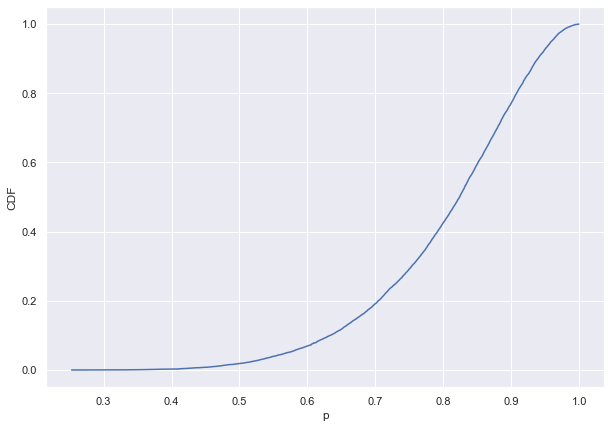

In [77]:
# Generate data ECDF & model CDF
beta_samples = np.random.beta(8,2,10000) #8 success and 2 failures 
x_beta, y_beta = ecdf(beta_samples)

# Plot data & model (E)CDFs
_ = plt.plot(x_beta, y_beta)
_ = plt.xlabel('p')
_ = plt.ylabel('CDF')

What is the probability the proability of success is less than 0.7

In [80]:
p = beta.cdf(.7, 8, 2)
p

0.19600323399999992

What is the probability the proability of success is between 0.7 and .9

In [81]:
p = beta.cdf(.9, 8, 2)- beta.cdf(.7, 8, 2)
p

0.5788377440000003

### Uniform 

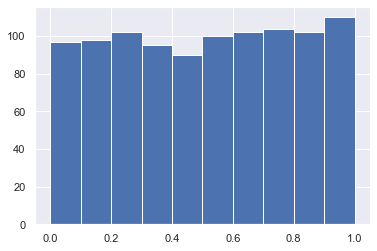

In [34]:
# Draw 1,000 samples from uniform & plot results
x = np.random.rand(1000)
plt.hist(x);

In [43]:
#To then simulate the sampling from the population,
#we check whether each float was greater or less than 0.5. 
#If less than or equal to 0.5, we say the person clicked.

# Computed how many people click
clicks = x <= 0.5
n_clicks = sum(clicks)
f"Number of clicks = {n_clicks}"
#The proportion of people who clicked can be calculated as 
#the total number of clicks over the number of people:

'Number of clicks = 482'

In [44]:
# Computed proportion of people who clicked
f"Proportion who clicked = {n_clicks/len(clicks)}"

'Proportion who clicked = 0.482'

In [45]:
x

array([0.96487836, 0.59270405, 0.9449066 , 0.91511649, 0.82842641,
       0.10173297, 0.38717878, 0.21460169, 0.26827381, 0.06635134,
       0.98868774, 0.15189666, 0.32713309, 0.71641682, 0.50616918,
       0.85074888, 0.63795908, 0.6671699 , 0.22434431, 0.38160893,
       0.09052638, 0.35268013, 0.86934584, 0.28764224, 0.76209035,
       0.15602511, 0.17339481, 0.94884993, 0.80154079, 0.55337375,
       0.71675438, 0.79946178, 0.57882421, 0.60267858, 0.86145453,
       0.50859361, 0.99221708, 0.93525478, 0.90771801, 0.18737511,
       0.36667548, 0.58700552, 0.45673447, 0.71960792, 0.92021247,
       0.91687906, 0.09123262, 0.92618045, 0.36325592, 0.32588025,
       0.39905375, 0.30495403, 0.1102675 , 0.40780933, 0.99323545,
       0.61056409, 0.97770811, 0.9275569 , 0.78000894, 0.97200203,
       0.21471461, 0.05203007, 0.71115585, 0.13651369, 0.44907903,
       0.61307866, 0.12754123, 0.86606293, 0.99976464, 0.17695548,
       0.13538125, 0.58590978, 0.32299121, 0.08777952, 0.34960

## Estimation

Estimation

An recurring statistical problem is finding estimates of the relevant parameters that correspond to the distribution that best represents our data.

In **parametric** inference, we specify *a priori* a suitable distribution, then choose the parameters that best fit the data.

* e.g. $\mu$ and $\sigma^2$ in the case of the normal distribution

#### Maximum Likelihood


**Maximum likelihood** (ML) fitting is usually more work than the method of moments, but it is preferred as the resulting estimator is known to have good theoretical properties. 

There is a ton of theory regarding ML. We will restrict ourselves to the mechanics here.

Say we have some data $y = y_1,y_2,\ldots,y_n$ that is distributed according to some distribution:

<div style="font-size: 120%;">  
$$Pr(Y_i=y_i | \theta)$$
</div>

The product $\prod_{i=1}^n Pr(y_i | \theta)$ gives us a measure of how **likely** it is to observe values $y_1,\ldots,y_n$ given the parameters $\theta$. Maximum likelihood fitting consists of choosing the appropriate function $l= Pr(Y|\theta)$ to maximize for a given set of observations. We call this function the *likelihood function*, because it is a measure of how likely the observations are if the model is true.

> Given these data, how likely is this model?

for example, is a Poisson distribution that describes the distribution of some discrete variables, typically counts:

Why are we interested in the likelihood function?

A reasonable estimate of the true, unknown value for the parameter is one which maximizes the likelihood function. So, inference is reduced to an optimization problem.

**How is the likelihood function different than the probability distribution function (PDF)?** 
- The likelihood is a function of the parameter(s) given the data, whereas the PDF returns the probability of data given a particular parameter value. Here is the PDF of the Poisson for  𝜆=5 .



## Joint Probability & Conditional Probability


#### Joint Probability

#### Conditional Probability

#### Joint and conditional probabilities: Bayes Rule